# **Recommandation System Assignment**

# **Assignment 10**

# ***Book DataSet(book.csv)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [2]:
#importing dataset
book=pd.read_csv('book.csv',encoding='latin1')
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


# **Exploratory Data Analysis**

In [3]:
#unnamed columns is useless so drop that

In [4]:
book.drop('Unnamed: 0',axis='columns',inplace=True)

In [5]:
#now lets change the columns name into familiar name

In [6]:
book.rename(columns={'User.ID':'userId','Book.Title':'title','Book.Rating':'rating'},inplace=True)

In [7]:
book

,userId,title,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [8]:
book.head(10)

,userId,title,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
5,276744,The Kitchen God's Wife,7
6,276745,What If?: The World's Foremost Military Histor...,10
7,276747,PLEADING GUILTY,9
8,276747,Under the Black Flag: The Romance and the Real...,9
9,276747,Where You'll Find Me: And Other Stories,8


In [9]:
book.shape

(10000, 3)

In [10]:
#checking missing values
(book.isna().sum())/len(book)*100

userId    0.0
title     0.0
rating    0.0
dtype: float64

In [11]:
book.isna().any()

userId    False
title     False
rating    False
dtype: bool

In [12]:
#checking duplicates
book.duplicated().sum()

2

In [13]:
book[book.duplicated()]

,userId,title,rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [14]:
#checking datatypes
book.dtypes

userId     int64
title     object
rating     int64
dtype: object

In [15]:
book.describe()

,userId,rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [16]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  10000 non-null  int64 
 1   title   10000 non-null  object
 2   rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [17]:
book.nunique()

userId    2182
title     9659
rating      10
dtype: int64

In [18]:
book['userId'].unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129])

In [19]:
book['userId'].nunique()

2182

In [20]:
book['title'].nunique()

9659

In [21]:
book['title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [22]:
book['title'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: title, Length: 9659, dtype: int64

In [23]:
book['rating'].unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [24]:
book['rating'].value_counts().sort_index()

1       43
2       63
3      146
4      237
5     1007
6      920
7     2076
8     2283
9     1493
10    1732
Name: rating, dtype: int64

In [25]:
book.sort_values('userId')

,userId,title,rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


# **Correlation**

In [26]:
#correlation
book.corr()

,userId,rating
userId,1.000000,-0.041523
rating,-0.041523,1.000000


# **Visualization**

<Axes: >

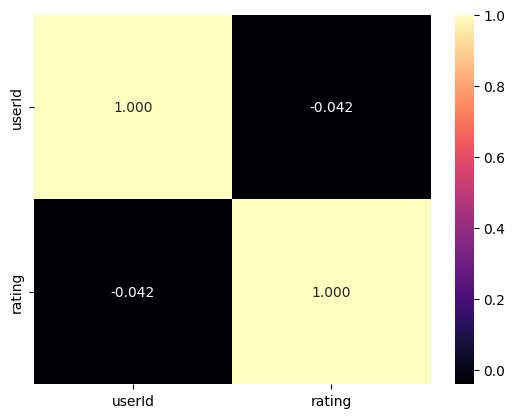

In [27]:
#heatmap
sns.heatmap(book.corr(),annot=True,cmap='magma',fmt='.3f')

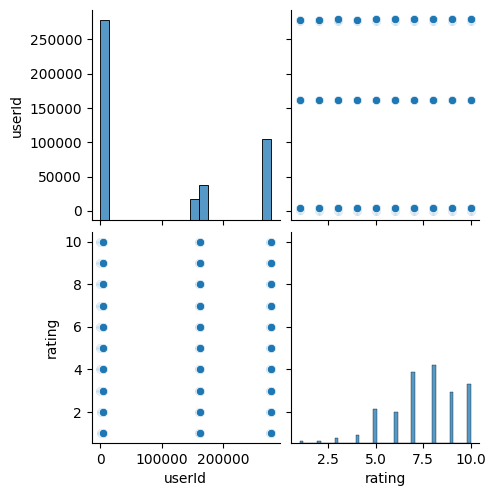

In [28]:
#pairplot
sns.pairplot(book)

In [29]:
book.head()

,userId,title,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


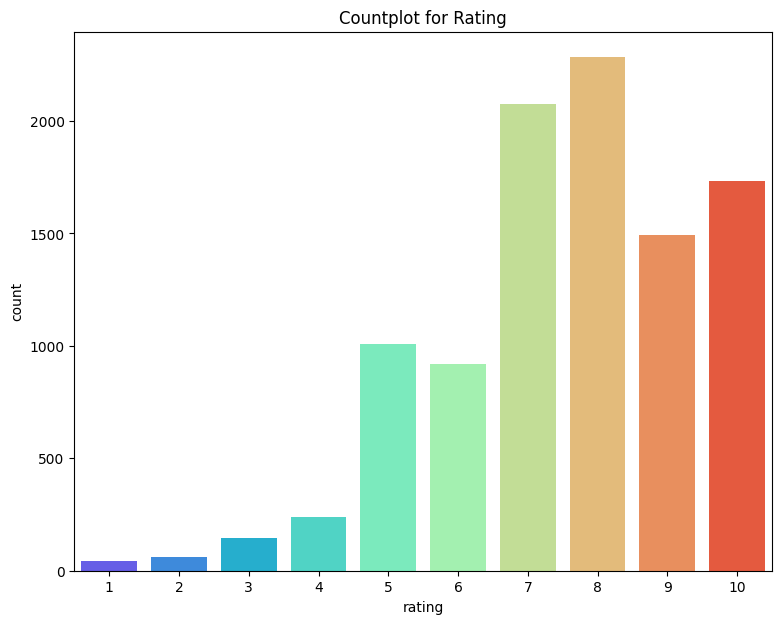

In [30]:
#barplot
plt.figure(figsize=(9,7))
sns.countplot(x='rating',data=book,palette='rainbow')
plt.title('Countplot for Rating')
plt.show()

<Figure size 1000x700 with 0 Axes>

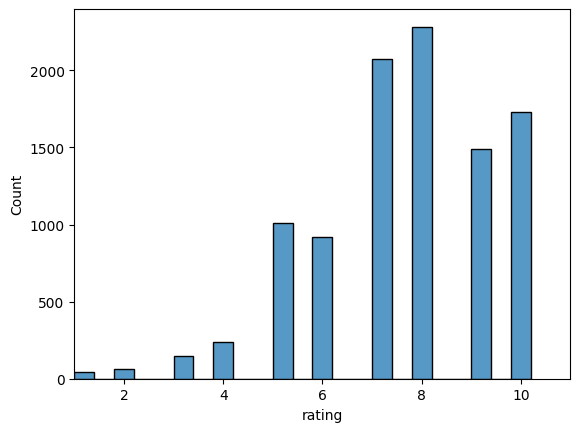

<Figure size 1000x700 with 0 Axes>

In [31]:
#histogram
sns.histplot(book['rating'],binwidth=0.4)
plt.xlim(1,11)
plt.figure(figsize=(10,7))

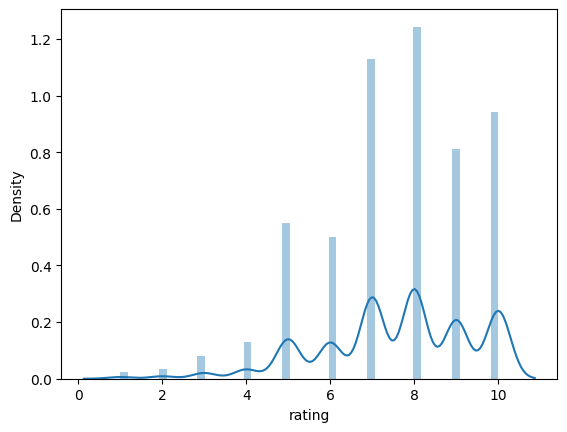

In [32]:
#densityplot
sns.distplot(book['rating'])
plt.show()

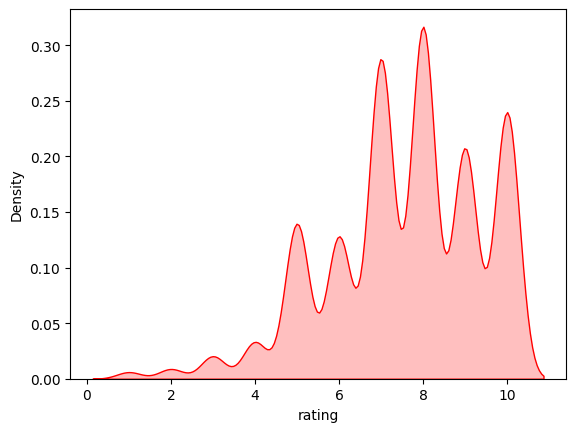

In [33]:
#kde plot
sns.kdeplot(book['rating'],color='red',shade=True)
plt.show()

<Axes: >

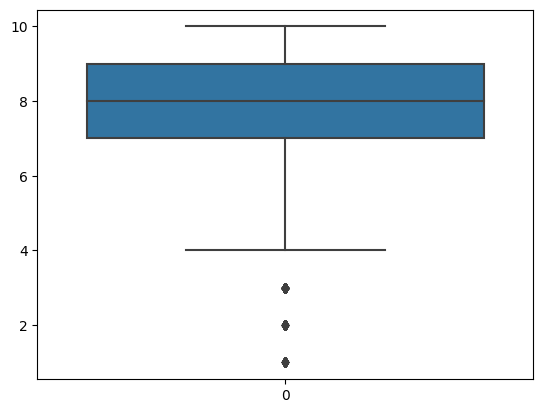

In [34]:
#boxplot
sns.boxplot(book['rating'])

# **Recommendation System Model**

In [35]:
user_bookdf=book.pivot_table(index='userId',columns='title',values='rating')
user_bookdf

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userId,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [36]:
user_bookdf.fillna(0,inplace=True)

In [37]:
user_bookdf.head()

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userId,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#now calculating cosine similarities

In [39]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [40]:
user_sim=1-pairwise_distances(user_bookdf,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [41]:
user_simdf=pd.DataFrame(user_sim)
user_simdf

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
book['userId'].unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129])

In [43]:
user_simdf.index=book['userId'].unique()
user_simdf.columns=book['userId'].unique()

In [44]:
user_simdf

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
np.fill_diagonal(user_sim,0)

In [46]:
user_simdf.iloc[0:20,0:20]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,276755,276760,276762,276768,276772,276774,276780,276786,276788,276796
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
user_simdf.idxmax(axis=1)[0:20]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
276748    161677
276751    276726
276754    276726
276755    276726
276760    276726
276762    276726
276768    276726
276772      1491
276774    278543
276780    276726
276786    276726
276788    276726
276796    276726
dtype: int64

In [48]:
user_simdf.idxmax(axis=1).tail(20)

162030    276726
162031    276726
162035    276726
162038    276726
162044    276726
162047    276726
162052    276726
162054    276726
162063    276726
162068    276726
162085    276726
162091    276726
162092    276726
162095    161157
162103      3505
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
dtype: int64

# **Example-1**

In [49]:
user1=book[book['userId']==276748]
user1

,userId,title,rating
12,276748,The Middle Stories,6


In [50]:
user2=book[book['userId']==161677]
user2

,userId,title,rating
9190,161677,The Biggest Pumpkin Ever,8
9191,161677,The Twelve Dancing Princesses: A Folk Tale fro...,9
9192,161677,Do You Know?,5
9193,161677,The good-by day (A Little golden book),8
9194,161677,Pooh Trick or Treat! (Little Golden Books),6
9195,161677,Cookie Monster/Cookie Tree,8
9196,161677,My Little Golden Book of Cars and Trucks (Litt...,7
9197,161677,I Think That It is Wonderful: Featuring Jim He...,8
9198,161677,Grover's Own Alphabet,8
9199,161677,Best Little Word Book Ever! (Little Golden Book),10


In [51]:
book[(book['userId']==276748)|(book['userId']==161677)]

,userId,title,rating
12,276748,The Middle Stories,6
9190,161677,The Biggest Pumpkin Ever,8
9191,161677,The Twelve Dancing Princesses: A Folk Tale fro...,9
9192,161677,Do You Know?,5
9193,161677,The good-by day (A Little golden book),8
9194,161677,Pooh Trick or Treat! (Little Golden Books),6
9195,161677,Cookie Monster/Cookie Tree,8
9196,161677,My Little Golden Book of Cars and Trucks (Litt...,7
9197,161677,I Think That It is Wonderful: Featuring Jim He...,8
9198,161677,Grover's Own Alphabet,8


In [52]:
user1.title

12    The Middle Stories
Name: title, dtype: object

In [53]:
user1_read_book=list(set(user1.title))
user2_read_book=list(set(user2.title))
for bname in user1_read_book:
  if bname not in user2_read_book:
    print('Recommend to user2:',bname)

Recommend to user2: The Middle Stories


# **Example-2**

In [54]:
user3=book[book['userId']==162103]
user4=book[book['userId']==3505]

In [55]:
user3

,userId,title,rating
9986,162103,Slowness: A Novel,7


In [56]:
user4

,userId,title,rating
6730,3505,The Infinity Concerto,8


In [57]:
user3_read_book=list(set(user3.title))
user4_read_book=list(set(user4.title))
for bname in user3_read_book:
  if bname not in user4_read_book:
    print('Recommend:',bname)

Recommend: Slowness: A Novel


# **Example-3**

In [58]:
user5=book[book['userId']==162030]
user6=book[book['userId']==276726]

In [59]:
user5

,userId,title,rating
9726,162030,Sudden Fiction,8
9727,162030,Best Friends,8
9728,162030,The Right Thing to Do: A Novel,7
9729,162030,The Vision of Emma Blau : A Novel,8
9730,162030,The Shadow of Desire,5
9731,162030,Eating Fire and Drinking Water,7
9732,162030,Moo,7
9733,162030,Cows Of Our Planet (Far Side Series),8
9734,162030,A Hero of Our Time (Penguin Classics),7
9735,162030,Strip Tease,7


In [60]:
user6

,userId,title,rating
0,276726,Classical Mythology,5


In [61]:
user5_read_book=list(set(user5.title))
user6_read_book=list(set(user6.title))
for bname in user5_read_book:
  if bname not in user6_read_book:
    print('Recommend to user6:',bname)

Recommend to user6: One Small Sparrow
Recommend to user6: Moo
Recommend to user6: The Friday Book: Essays and Other Nonfiction (Maryland Paperback Bookshelf)
Recommend to user6: Things Not Seen
Recommend to user6: A Hero of Our Time (Penguin Classics)
Recommend to user6: Strip Tease
Recommend to user6: Dance Real Slow
Recommend to user6: A Small Place
Recommend to user6: Best Friends
Recommend to user6: The Shadow of Desire
Recommend to user6: Ain't Gonna Be the Same Fool Twice
Recommend to user6: The Right Thing to Do: A Novel
Recommend to user6: Cows Of Our Planet (Far Side Series)
Recommend to user6: The Robber Bride
Recommend to user6: Sudden Fiction
Recommend to user6: False Allegations (Vintage Crime/Black Lizard)
Recommend to user6: Eating Fire and Drinking Water
Recommend to user6: Shades of Jade: A Novel
Recommend to user6: The Vision of Emma Blau : A Novel
Recommend to user6: The Beach


In [62]:
#so here i have performed recommendation for 3(similar) users
#we can check for all, by performing this above steps///
#This is how recommendation system works.

In [63]:
##completed/////

# **Completed**